In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from shapely.geometry import LineString

In [14]:
import os
b_path = 'C:\\Users\\user\\Desktop\\data\\geopd'


# 1) Load the data.

옵션
- parse_dates : 데이터 받을 때 시계열 데이터를 datetime 형식으로 받음
    - df.to_datetime과 동일 효과

In [15]:
# Load the data and print the first 5 rows
birds_path = os.path.join(b_path, 'purple_martin.csv')
birds_df = pd.read_csv(birds_path, parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [16]:
birds_df.columns

Index(['timestamp', 'location-long', 'location-lat', 'tag-local-identifier'], dtype='object')

In [19]:
# Your code here: Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, 
                         geometry = gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))

# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds.crs = {'init': 'epsg:4326'}
birds.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


Recommends
- CRS import 해서 사용

In [22]:
from pyproj import CRS
# Your code here: Create the GeoDataFrame
birds2 = gpd.GeoDataFrame(birds_df, 
                         geometry = gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))
# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds2.crs = CRS("EPSG:4326")

In [23]:
birds2.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


# 2) Plot the data.

In [24]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


<AxesSubplot:>

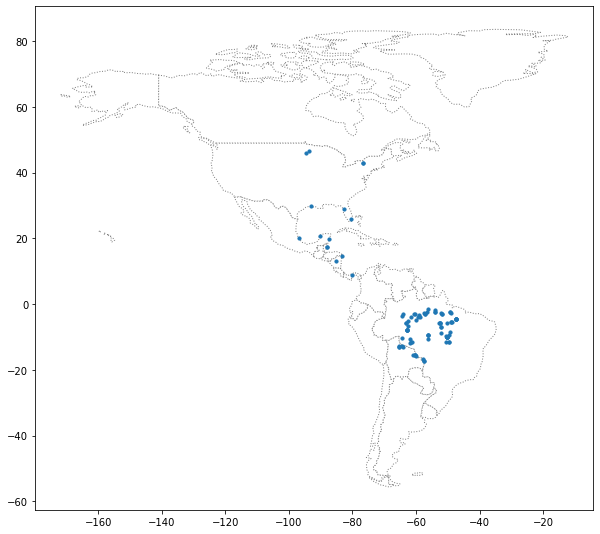

In [27]:
ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
birds.plot(ax=ax, markersize=10)

# 3) Where does each bird start and end its journey? (Part 1)

In [32]:
from pyproj import CRS
# GeoDataFrame showing path for each bird
# apply(list) : groupby로 묶인 포인트 데이터를 리스트 형태로 묶음
# LineString : 각 포인트를 선으로 연결
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = CRS("EPSG:4326")

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = CRS("EPSG:4326")

# Show first five rows of GeoDataFrame
start_gdf.head()

,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


In [63]:
# Your code here
end_gdf = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x : x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_gdf, geometry = end_gdf['geometry'])
from pyproj import CRS
end_gdf.crs = CRS('EPSG:4326')
end_gdf

,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.03840)
2,30198,POINT (-57.46417 -2.77617)
3,30263,POINT (-50.19230 -5.70504)
4,30275,POINT (-57.70404 -16.72336)
5,30300,POINT (-50.22547 -9.84450)
6,30304,POINT (-52.55503 -5.85648)
7,30380,POINT (-63.98744 -2.93250)
8,30384,POINT (-51.85126 -2.90570)
9,30445,POINT (-53.97454 -2.35599)


# 4) Where does each bird start and end its journey? (Part 2)

<AxesSubplot:>

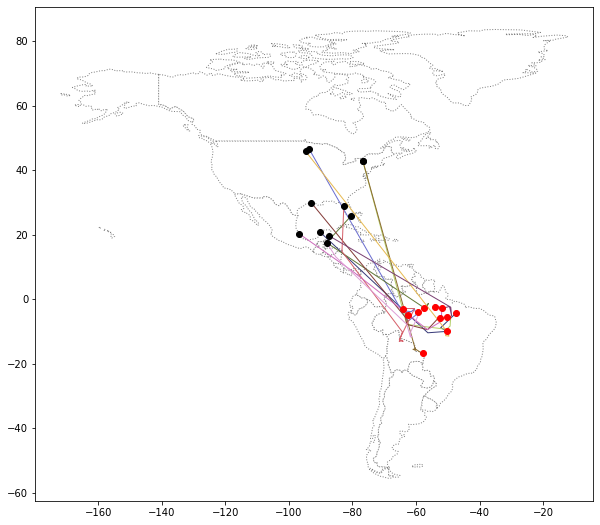

In [64]:
# Your code here
m1 = americas.plot(figsize = (10, 10), color = 'white', edgecolor = 'gray', linestyle = ':')
path_gdf.plot(cmap='tab20b', ax = m1, linewidth=1, zorder=1)
start_gdf.plot(color = 'black', ax = m1)
end_gdf.plot(color = 'red', ax = m1)
m1

# 5) Where are the protected areas in South America? (Part 1)

In [67]:
# Path of the shapefile to load
protected_filepath = os.path.join(b_path, 'SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp')

# Your code here
protected_areas = gpd.read_file(protected_filepath)

# 6) Where are the protected areas in South America? (Part 2)

<AxesSubplot:>

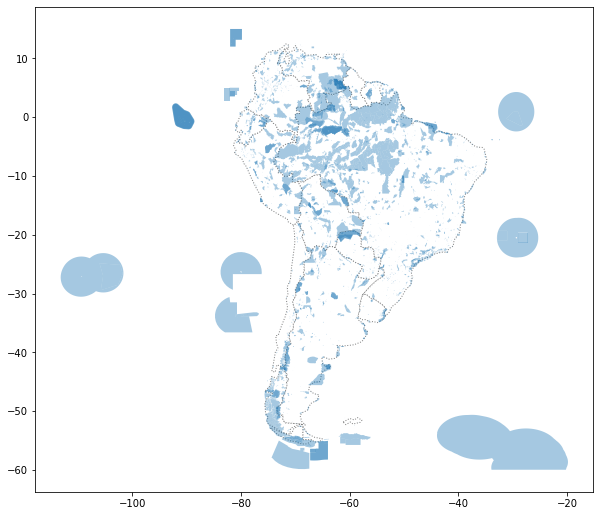

In [68]:
# Country boundaries in South America
south_america = americas.loc[americas['continent']=='South America']

# Your code here: plot protected areas in South America
ax1 = south_america.plot(figsize = (10, 10), color = 'white', edgecolor = 'gray', linestyle = ':')
protected_areas.plot(ax = ax1, alpha = 0.4)
ax1

# 7) What percentage of South America is protected

In [69]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


In [70]:
south_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


면적계산
- 3035로 crs 변환하여 사용
- crs별로 지도 생성 방법이 상이하여 결과가 달라짐
    - https://gisgeography.com/equal-area-projection-maps/

In [71]:
# Your code here: Calculate the total area of South America (in square kilometers)
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6

In [72]:
# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


# 8) Where are the birds in South America?

<AxesSubplot:>

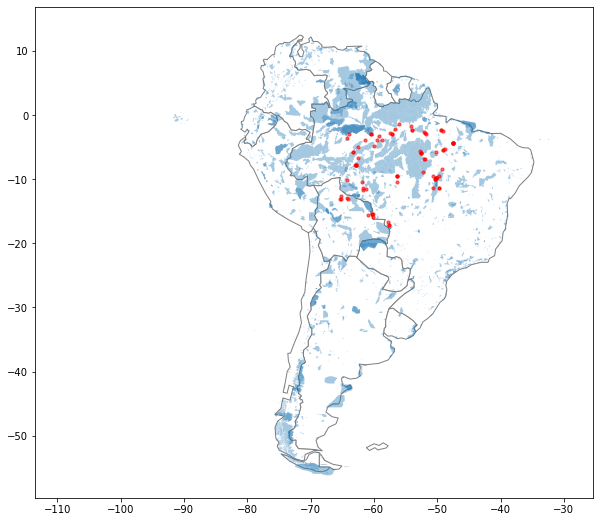

In [73]:
# Your code here
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)
